In [3]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

# STEP 2: Load the Titanic Dataset

In [26]:
df = pd.read_csv("Titanic-Dataset.csv")


In [27]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# STEP 3: Quick Data Understanding

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

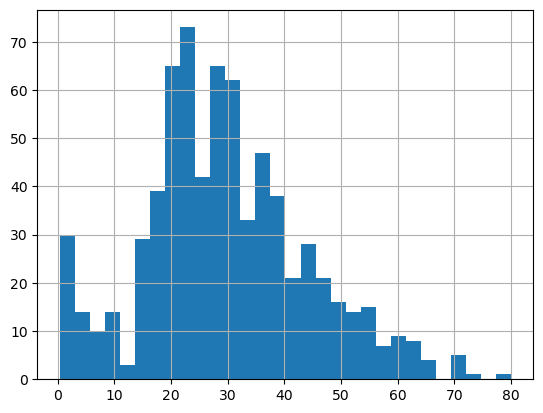

In [30]:
df['Age'].hist(bins=30)


# 2️⃣ Handle Age (Numerical, skewed)

In [31]:
df['Age'] = df['Age'].fillna(df['Age'].median())


# 3️⃣ Handle Embarked (Categorical, very few missing)

In [32]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# 4️⃣ Handle Cabin (Categorical, too many missing)

👉 Drop the column

In [33]:
df = df.drop(columns=['Cabin'])


In [34]:
df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# ALL test outputs.

In [35]:
results = pd.DataFrame(columns=[
    "Test_Name",
    "Variable_1",
    "Variable_2",
    "Statistic",
    "P_Value",
    "Conclusion"
])

# Does survival depend on whether the passenger is male or female?

# Chi-square test

In [36]:


contingency = pd.crosstab(df['Survived'], df['Sex'])
chi2, p, dof, expected = chi2_contingency(contingency)

results.loc[len(results)] = [
    "Chi-Square",
    "Survived",
    "Sex",
    chi2,
    p,
    "Significant" if p < 0.05 else "Not Significant"
]

# Does the mean of Age for Survived = 1 differ from the mean of Age for Survived = 0?

# ✅ t-test

In [22]:
survived = df[df['Survived'] == 1]['Age']
not_survived = df[df['Survived'] == 0]['Age']

t_stat, p = ttest_ind(survived, not_survived)

results.loc[len(results)] = [
    "T-Test",
    "Age",
    "Survived",
    t_stat,
    p,
    "Significant" if p < 0.05 else "Not Significant"
]

# Do passengers from different classes pay significantly different average fares?

# ✅ ANOVA

In [23]:
class1 = df[df['Pclass'] == 1]['Fare']
class2 = df[df['Pclass'] == 2]['Fare']
class3 = df[df['Pclass'] == 3]['Fare']

f_stat, p = f_oneway(class1, class2, class3)

results.loc[len(results)] = [
    "ANOVA",
    "Fare",
    "Pclass",
    f_stat,
    p,
    "Significant" if p < 0.05 else "Not Significant"
]

# Review the final output

In [24]:
results

,Test_Name,Variable_1,Variable_2,Statistic,P_Value,Conclusion
0,Chi-Square,Survived,Sex,260.717020,1.197357e-58,Significant
1,Chi-Square,Survived,Sex,260.717020,1.197357e-58,Significant
2,T-Test,Age,Survived,-1.939466,5.276069e-02,Not Significant
3,ANOVA,Fare,Pclass,242.344157,1.031376e-84,Significant
4,Chi-Square,Survived,Sex,260.717020,1.197357e-58,Significant
5,Chi-Square,Survived,Sex,260.717020,1.197357e-58,Significant
6,Chi-Square,Survived,Sex,260.717020,1.197357e-58,Significant
7,T-Test,Age,Survived,-1.939466,5.276069e-02,Not Significant
8,ANOVA,Fare,Pclass,242.344157,1.031376e-84,Significant
